In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Generate dummy sequence data

train: torch.Size([10, 1990, 1]) torch.Size([1990, 1])
test: torch.Size([10, 990, 1]) torch.Size([990, 1])


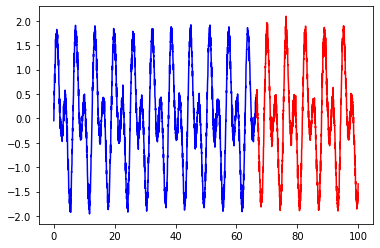

In [4]:
num_data = 3000
len_sequence = 10

raw_x = np.linspace(0.0, 100.0, num_data)
raw_y = np.sin(raw_x) + np.sin(2*raw_x) + np.random.normal(0, 0.1, num_data)

num_train=2000
num_test = num_data -num_train
train_input = np.zeros((num_train - len_sequence, len_sequence), dtype=np.float32)
train_output = np.zeros(num_train - len_sequence, dtype=np.float32)
test_input = np.zeros((num_test - len_sequence, len_sequence), dtype=np.float32)
test_output = np.zeros(num_test - len_sequence, dtype=np.float32)


for i in range(num_train - len_sequence):
    train_input[i] = raw_y[i:i+len_sequence]
    train_output[i] = raw_y[i+len_sequence]

for i in range(num_test - len_sequence):
    test_input[i] = raw_y[num_test + i: num_test + i + len_sequence]
    test_output[i] = raw_y[num_test + i +len_sequence]

train_input = torch.as_tensor(train_input).swapaxes_(0, 1).unsqueeze_(2)
train_output = torch.as_tensor(train_output).unsqueeze_(1)
test_input = torch.as_tensor(test_input).swapaxes_(0,1).unsqueeze_(2)
test_output = torch.as_tensor(test_output).unsqueeze_(1)


print("train:", train_input.shape, train_output.shape)
print("test:", test_input.shape, test_output.shape)

plt.plot(raw_x[:num_train], raw_y[:num_train], 'b-')
plt.plot(raw_x[num_train:], raw_y[num_train:], 'r-')
plt.show()


# Generate model

In [9]:
class RNN(nn.Module):
    def __init__(self, in_features, out_features, hidden_size):
        super(RNN, self).__init__()

        #* Get inputs
        self.in_features = in_features
        self.out_features = out_features
        self.hidden_size = hidden_size

        #* Generate matrixes for vanilla RNN
        self.U = nn.Linear(self.in_features, self.hidden_size, bias=False)
        self.W = nn.Linear(self.hidden_size, self.hidden_size, bias=False)
        self.V = nn.Linear(self.hidden_size, self.out_features, bias=False)

        #* Activations
        self.activation = nn.Tanh()

    def init_hidden(self, x):
        return torch.zeros(x.shape[0], self.hidden_size)

    def forward(self, x, h):
        h = self.activation(self.U(x) + self.W(h))
        y = self.V(h)
        return y, h

model = RNN(in_features=1, out_features=1, hidden_size=50)
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.005)

# Train the model

In [10]:
max_epoch = 100
model.train()
for epoch in range(max_epoch):
    #* Initialize hidden state
    for x in train_input:
        h = model.init_hidden(x)
        break

    #* Feed forward
    for x in train_input:
        y,h = model(x, h)
    
    #* Get loss
    loss = loss_func(y, train_output)
    print(loss.item())

    #* Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

2.2962193489074707
1.6941993236541748
1.254852294921875
0.9333480000495911
0.6978567242622375
0.5253946781158447
0.3991915285587311
0.3069382309913635
0.2395758032798767
0.1904342770576477
0.15460649132728577
0.1284884661436081
0.10943879187107086
0.09552592039108276
0.08534055203199387
0.0778566300868988
0.072328582406044
0.06821557134389877
0.06512590497732162
0.06277626007795334
0.06096190586686134
0.05953507125377655
0.05838916078209877
0.057447295635938644
0.05665409564971924
0.05596964433789253
0.0553651787340641
0.05481995642185211
0.054319046437740326
0.0538516491651535
0.053409986197948456
0.05298842117190361
0.05258287116885185
0.05219036713242531
0.05180875211954117
0.051436442881822586
0.051072269678115845
0.0507153645157814
0.05036507546901703
0.05002092197537422
0.04968251287937164
0.049349550157785416
0.049021802842617035
0.04869907721877098
0.048381198197603226
0.04806804656982422
0.04775948077440262
0.047455400228500366
0.0471557080745697
0.046860307455062866
0.0465691

# Test the model

In [16]:
prediction = []
model.eval()
with torch.no_grad():
    #* Initialize hidden state
    for x in test_input:
        h = model.init_hidden(x)
        break

    #* Feed forward
    for x in test_input:
        y, h = model(x,h)
    prediction = y

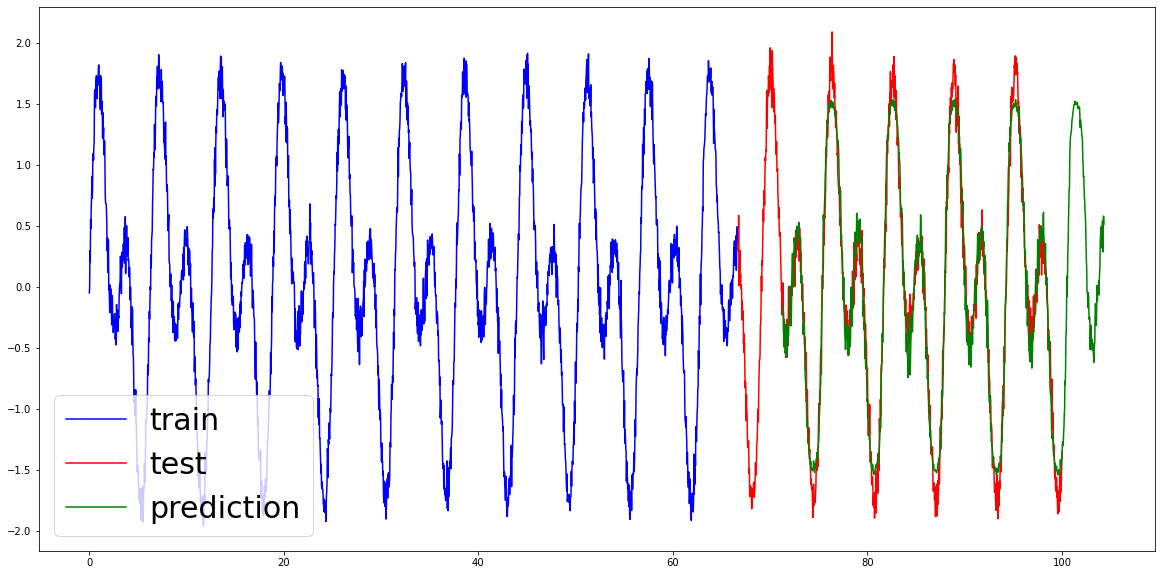

In [60]:
plt.figure(figsize=(20,10))
plt.plot(raw_x[:num_train], raw_y[:num_train], 'b-', label='train')
plt.plot(raw_x[num_train: ], raw_y[num_train:], 'r-', label='test')
plt.plot(raw_x[num_train + len_sequence: ] + 4.3, prediction, 'g-', label='prediction')
plt.legend(fontsize=30)
plt.show()